In [37]:
import networkx as nx
import json
import os
import ast
import itertools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
def process_record(G, keyword_dict, record):
    authors = record['authors']
    keywords = record['keywords']
    for author in authors:
        if G.has_node(author):
            pass
        else: 
           G.add_node(author)
           keyword_dict[author] = set(keywords)
    
    combinations = list(itertools.combinations(authors, 2))
    for combination in combinations:
        G.add_edge(combination[0], combination[1])
    return G

3422


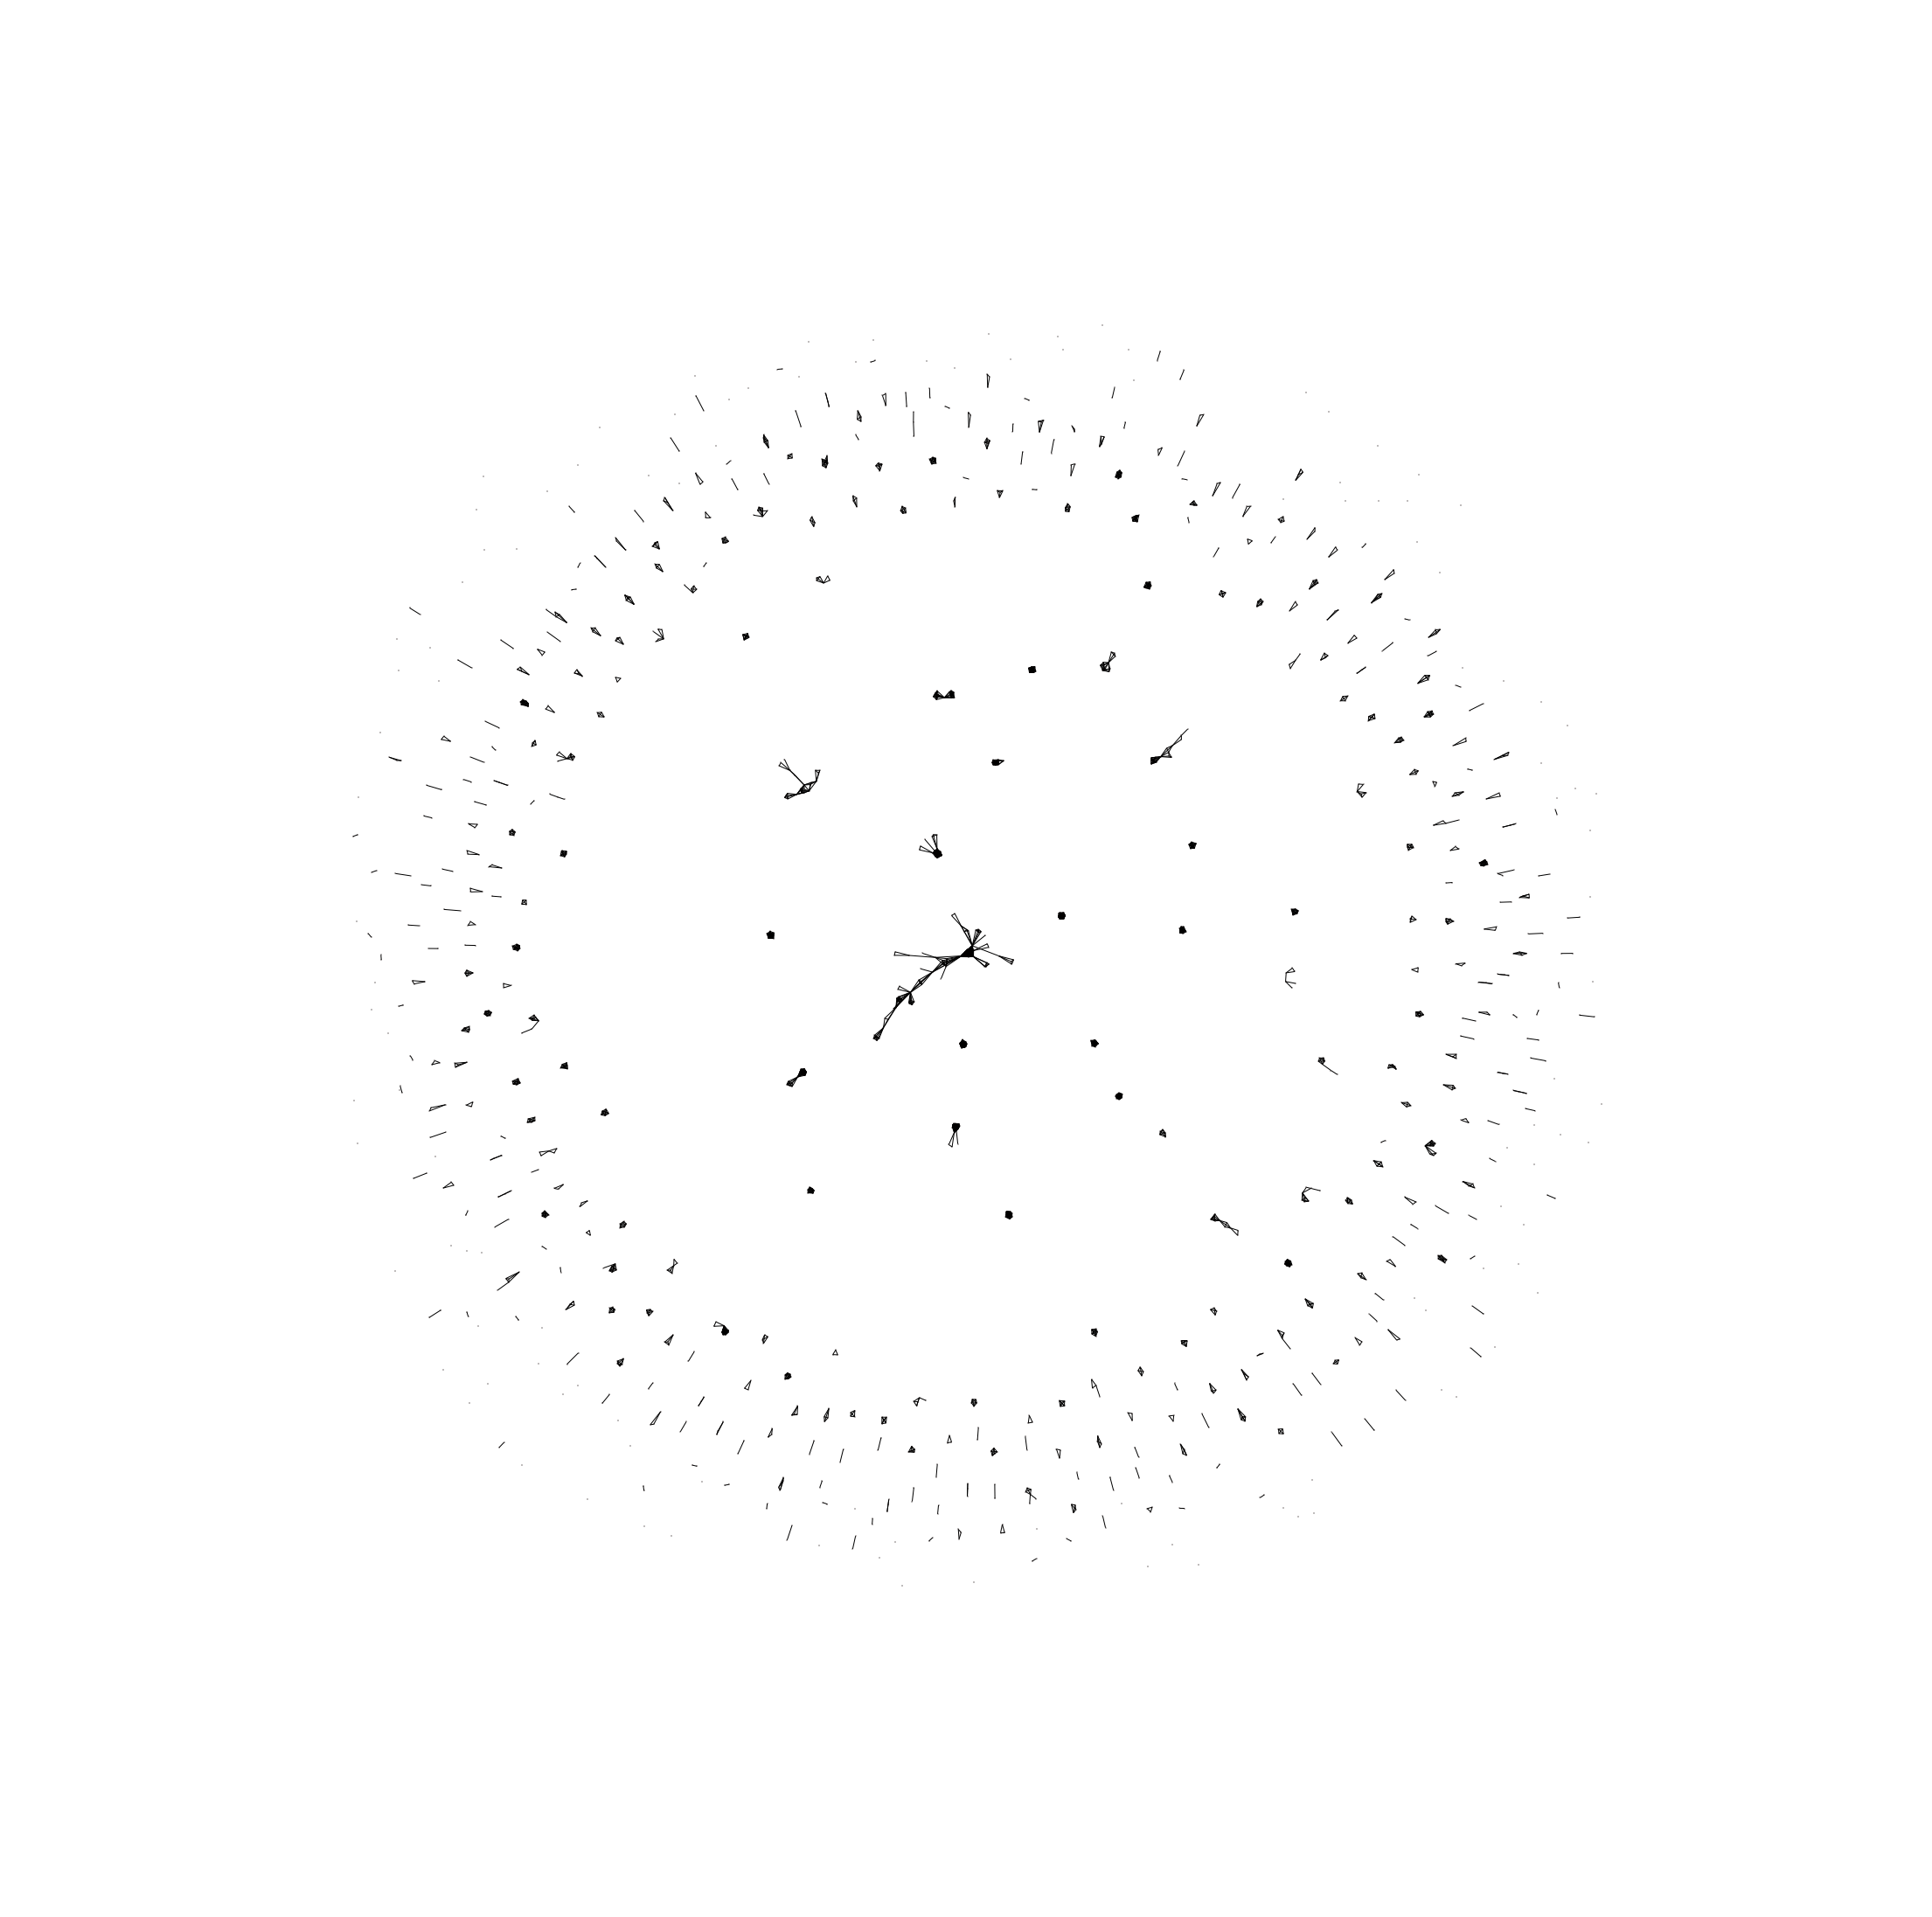

In [42]:
def main():
    G = nx.Graph()
    keyword_dict = {}
    for i in os.listdir('./data_out'):
        if i.endswith("__test.json"): 
            coauthor_file = open('./data_out/' + i)
            coauthor_records = coauthor_file.read().splitlines()
            for record_str in coauthor_records:
                #print(record_str)
                record = ast.literal_eval(record_str)
                G = process_record(G, keyword_dict, record)
    print(G.number_of_edges())
    plt.figure(3,figsize=(30,30)) 
    nx.draw(G, node_size=0.1, figsize=(20,20))
    plt.draw()
if __name__ == "__main__":
    main()

NameError: name 'G' is not defined